In [303]:
import numpy as np
import matplotlib.pyplot as plt

In [304]:
# Policy parameterization: Softmax
# State value parameterization: Linear
# State feature vector representation: Fourier (as in HW2)

In [305]:
M = 3 # dimensionality of the fourier transform [2, 10]
# mean_policy_vector = np.ones(2*M+1)*0.05 #some non-zero vector

policy_params = np.ones((2*M+1,2))*0.01
value_params = np.ones(2*M+1)*0.01

softmax_sigma = 0.1
# policy_params = np.zeros((np.power(M+1,2),2))
# value_params = np.zeros(np.power(M+1,2))

policy_step_size = 1e-6 #2e-9
valueFunction_step_size = 1e-7
gamma = 1

In [306]:
def phi_s_cosine(given_x, given_v, cosineFlag):
    normal_x = normalized_x(given_x, cosineFlag)
    normal_v = normalized_v(given_v, cosineFlag)
    feature_phi = np.zeros(2*M+1)
#     feature_phi = np.zeros(np.power(M+1,2))
    feature_phi[0] = 1
    if cosineFlag:
        for i in range(1, M+1):
            feature_phi[i] = np.cos(i*np.pi*normal_x)
        
        for i in range(1, M+1):
            feature_phi[M+i] = np.cos(i*np.pi*normal_v)

#         for i in range(0,M+1):
#             for j in range(0,M+1):
#                 if i==0 or j==0:
#                     feature_phi[(M+1)*i + j] = np.cos(np.pi*(i*normal_x + j*normal_v))
#                 else:
#                     feature_phi[(M+1)*i + j] = np.cos(np.pi*(i*normal_x + j*normal_v))
    
    else:
        for i in range(1, M+1):
            feature_phi[i] = np.sin(i*np.pi*normal_x)
        
        for i in range(1, M+1):
            feature_phi[M+i] = np.sin(i*np.pi*normal_v)

#         for i in range(0,M+1):
#             for j in range(0,M+1):
#                 if i==0 or j==0:
#                     feature_phi[(M+1)*i + j] = np.cos(np.pi*(i*normal_x + j*normal_v))
#                 else:
#                     feature_phi[(M+1)*i + j] = np.cos(np.pi*(i*normal_x + j*normal_v))

    return feature_phi

In [307]:
def normalized_x(given_x, cosineFlag):
    if cosineFlag:
        return (given_x+1.2)/(0.5+1.2)
    else:
        return ((given_x+1.2)/(0.5+1.2))*2 - 1
def normalized_v(given_v, cosineFlag):
    if cosineFlag:
        return (given_v+0.7)/(0.7+0.7)
    else:
        return ((given_v+0.7)/(0.7+0.7))*2 - 1

In [308]:
def runEpisode(policy_params, gamma):
    
    episode_trace = []
    
    total_reward = 0
    x_0 = np.random.uniform(-0.6,-0.4,1)[0]
    begin_state = (x_0,0)
    
    S_t = begin_state
    S_t_plus_1 = begin_state
    for t in range(0, 1000):
        
        state_feature_vector = phi_s_cosine(S_t[0], S_t[1], True)
        state_feature_policy_param_product = np.dot(policy_params.T, state_feature_vector)
        exp_terms = np.exp(softmax_sigma * state_feature_policy_param_product)
        pi_values = exp_terms/np.sum(exp_terms)
        
#         A_t = np.random.choice([-1,1], p=list(pi_values))
        
        max_action_idx = np.argmax(pi_values)
        if max_action_idx==1:
            A_t = 1
        else:
            A_t = -1
        
#         threshold = np.dot(state_feature_vector, given_theta)
        
#         print(threshold)
        
#         if threshold<=0:
#             A_t = -1
#         else:
#             A_t = 1
        
        v_t_plus_1 = S_t[1] + 0.001*A_t - 0.0025*np.cos(3*S_t[0])
        x_t_plus_1 = S_t[0] + v_t_plus_1
        
        
        
        if x_t_plus_1 < -1.2:
            x_t_plus_1 = -1.2
            v_t_plus_1 = 0
        elif x_t_plus_1 > 0.5:
            x_t_plus_1 = 0.5
            v_t_plus_1 = 0
        
        if v_t_plus_1 < -0.7:
            v_t_plus_1 = -0.7
        elif v_t_plus_1 > 0.7:
            v_t_plus_1 = 0.7
        
        S_t_plus_1 = (x_t_plus_1, v_t_plus_1)
        
        if x_t_plus_1 == 0.5:
            print("Terminated")
            episode_trace.append((S_t, A_t, 0))
            break
        else:
            episode_trace.append((S_t, A_t, -1))
            total_reward += -1
#         print("After ",total_reward)
        

        S_t = S_t_plus_1 #Incrementing time step
    return episode_trace


 EPISODE LENGTH:  1000 CURR ITER:  1
1e-06 1e-07  Max diff:  0.25932829526805184
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  2
1e-06 1e-07  Max diff:  0.25629802382330874
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  3
1e-06 1e-07  Max diff:  0.08379970751250661
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  4
1e-06 1e-07  Max diff:  0.2574875160226674
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  5
1e-06 1e-07  Max diff:  0.20718542249699765
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  6
1e-06 1e-07  Max diff:  0.04999218042948833
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  7
1e-06 1e-07  Max diff:  0.10202793854347918
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  8
1e-06 1e-07  Max diff:  0.15994372574620006
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  9
1e-06 1e-07  Max diff:  0.20441033150512028
Mean episode length:  1000.0

 

1e-06 1e-07  Max diff:  0.15560080809879256
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  75
1e-06 1e-07  Max diff:  0.13733800682643982
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  76
1e-06 1e-07  Max diff:  0.12530855949668687
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  77
1e-06 1e-07  Max diff:  0.17921419899550553
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  78
1e-06 1e-07  Max diff:  0.2482495619337668
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  79
1e-06 1e-07  Max diff:  0.21529015792969963
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  80
1e-06 1e-07  Max diff:  0.13520929574993182
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  81
1e-06 1e-07  Max diff:  0.11123227457238091
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITER:  82
1e-06 1e-07  Max diff:  0.07685030020519343
Mean episode length:  1000.0

 EPISODE LENGTH:  1000 CURR ITE

1e-06 1e-07  Max diff:  0.11869982295389014
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CURR ITER:  148
1e-06 1e-07  Max diff:  0.13226635636032166
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CURR ITER:  149
1e-06 1e-07  Max diff:  0.1480573011901603
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CURR ITER:  150
1e-06 1e-07  Max diff:  0.2435859769196062
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CURR ITER:  151
1e-06 1e-07  Max diff:  0.24036490363584723
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CURR ITER:  152
1e-06 1e-07  Max diff:  0.14816837438918873
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CURR ITER:  153
1e-06 1e-07  Max diff:  0.14250231598600607
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CURR ITER:  154
1e-06 1e-07  Max diff:  0.2443209203749219
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CURR ITER:  155
1e-06 1e-07  Max diff:  0.2423020993097618
Mean episode length:  996.48

 EPISODE LENGTH:  1000 CUR


 EPISODE LENGTH:  1000 CURR ITER:  220
1e-06 1e-07  Max diff:  0.07892547813980619
Mean episode length:  983.04

 EPISODE LENGTH:  1000 CURR ITER:  221
1e-06 1e-07  Max diff:  0.07713302264170122
Mean episode length:  983.04
Terminated

 EPISODE LENGTH:  797 CURR ITER:  222
1e-06 1e-07  Max diff:  0.06249089525645769
Mean episode length:  981.01
Terminated

 EPISODE LENGTH:  621 CURR ITER:  223
1e-06 1e-07  Max diff:  0.044917053869519455
Mean episode length:  977.22

 EPISODE LENGTH:  1000 CURR ITER:  224
1e-06 1e-07  Max diff:  0.24215450353661194
Mean episode length:  977.22

 EPISODE LENGTH:  1000 CURR ITER:  225
1e-06 1e-07  Max diff:  0.23800014141979275
Mean episode length:  977.22

 EPISODE LENGTH:  1000 CURR ITER:  226
1e-06 1e-07  Max diff:  0.11645941939382462
Mean episode length:  977.22

 EPISODE LENGTH:  1000 CURR ITER:  227
1e-06 1e-07  Max diff:  0.13958749141129434
Mean episode length:  977.22

 EPISODE LENGTH:  1000 CURR ITER:  228
1e-06 1e-07  Max diff:  0.240861402

1e-06 1e-07  Max diff:  0.23228196864990136
Mean episode length:  987.73

 EPISODE LENGTH:  1000 CURR ITER:  293
1e-06 1e-07  Max diff:  0.23597266103324777
Mean episode length:  987.73

 EPISODE LENGTH:  1000 CURR ITER:  294
1e-06 1e-07  Max diff:  0.1827545827469424
Mean episode length:  987.73

 EPISODE LENGTH:  1000 CURR ITER:  295
1e-06 1e-07  Max diff:  0.08701741220832032
Mean episode length:  987.73

 EPISODE LENGTH:  1000 CURR ITER:  296
1e-06 1e-07  Max diff:  0.049413916084517756
Mean episode length:  987.73

 EPISODE LENGTH:  1000 CURR ITER:  297
1e-06 1e-07  Max diff:  0.03332649889917089
Mean episode length:  987.73

 EPISODE LENGTH:  1000 CURR ITER:  298
1e-06 1e-07  Max diff:  0.08820074311670392
Mean episode length:  987.73

 EPISODE LENGTH:  1000 CURR ITER:  299
1e-06 1e-07  Max diff:  0.12245565644413019
Mean episode length:  987.73

 EPISODE LENGTH:  1000 CURR ITER:  300
1e-06 1e-07  Max diff:  0.23625958955196347
Mean episode length:  987.73

 EPISODE LENGTH:  1000

Terminated

 EPISODE LENGTH:  197 CURR ITER:  367
1e-06 1e-07  Max diff:  0.0020083755052717825
Mean episode length:  859.91
Terminated

 EPISODE LENGTH:  136 CURR ITER:  368
1e-06 1e-07  Max diff:  0.0011147904170375235
Mean episode length:  851.27
Terminated

 EPISODE LENGTH:  204 CURR ITER:  369
1e-06 1e-07  Max diff:  0.0009093065633108931
Mean episode length:  843.31
Terminated

 EPISODE LENGTH:  139 CURR ITER:  370
1e-06 1e-07  Max diff:  0.001169105601859715
Mean episode length:  834.7
Terminated

 EPISODE LENGTH:  147 CURR ITER:  371
1e-06 1e-07  Max diff:  0.0012309200735883125
Mean episode length:  826.17
Terminated

 EPISODE LENGTH:  162 CURR ITER:  372
1e-06 1e-07  Max diff:  0.0011394597810276477
Mean episode length:  817.79
Terminated

 EPISODE LENGTH:  159 CURR ITER:  373
1e-06 1e-07  Max diff:  0.001079974892891595
Mean episode length:  809.38
Terminated

 EPISODE LENGTH:  215 CURR ITER:  374
1e-06 1e-07  Max diff:  0.003595128979150892
Mean episode length:  801.53
Term

1e-06 1e-07  Max diff:  0.001750025359251662
Mean episode length:  255.74
Terminated

 EPISODE LENGTH:  148 CURR ITER:  440
1e-06 1e-07  Max diff:  0.0015785108473541677
Mean episode length:  247.22
Terminated

 EPISODE LENGTH:  133 CURR ITER:  441
1e-06 1e-07  Max diff:  0.00044172556068469704
Mean episode length:  238.55
Terminated

 EPISODE LENGTH:  185 CURR ITER:  442
1e-06 1e-07  Max diff:  0.0016776332669436317
Mean episode length:  230.4
Terminated

 EPISODE LENGTH:  211 CURR ITER:  443
1e-06 1e-07  Max diff:  0.0010386343342040673
Mean episode length:  222.51
Terminated

 EPISODE LENGTH:  155 CURR ITER:  444
1e-06 1e-07  Max diff:  0.0005915136555420739
Mean episode length:  214.06
Terminated

 EPISODE LENGTH:  156 CURR ITER:  445
1e-06 1e-07  Max diff:  0.0002596113570256242
Mean episode length:  205.62
Terminated

 EPISODE LENGTH:  159 CURR ITER:  446
1e-06 1e-07  Max diff:  0.0012176723118921921
Mean episode length:  197.21
Terminated

 EPISODE LENGTH:  177 CURR ITER:  447
1

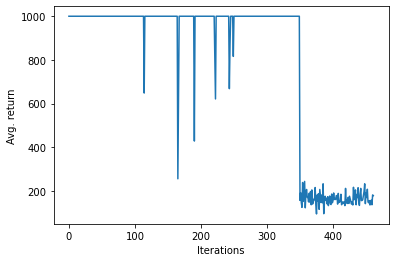

In [309]:
#With baseline
episode_length = []
curr_iter = 0
while(curr_iter<=2500):
    curr_iter += 1
    
    episode_trace = runEpisode(policy_params, gamma)
    print("\n EPISODE LENGTH: ",len(episode_trace), "CURR ITER: ", curr_iter)
    episode_length.append(len(episode_trace))
    policy_params_temp = policy_params.copy()
    for a_step in range(len(episode_trace)):
        G = 0
        for idx in range(a_step, len(episode_trace)):
            G += episode_trace[idx][2]
        
        state_t = episode_trace[a_step][0]
        state_t_feature_vector = phi_s_cosine(state_t[0], state_t[1], True)

        v_hat_s = np.dot(state_t_feature_vector, value_params)
        delta = G - v_hat_s
        
        value_params += valueFunction_step_size*delta*state_t_feature_vector
        

        state_t_feature_policy_param_product = np.dot(policy_params.T, state_t_feature_vector)
        
        
        exp_terms = np.exp(softmax_sigma*state_t_feature_policy_param_product)
        pi_values = exp_terms/np.sum(exp_terms)
        
#         print("Pi values: ",pi_values)
#         print("G: ",G,". Delta: ",delta)
        if episode_trace[a_step][1] == -1:
            policy_params[:,0] += policy_step_size*delta*(1-pi_values[0])*state_t_feature_vector
            policy_params[:,1] += policy_step_size*delta*(-pi_values[0])*state_t_feature_vector
        else:
            policy_params[:,0] += policy_step_size*delta*(-pi_values[1])*state_t_feature_vector
            policy_params[:,1] += policy_step_size*delta*(1-pi_values[1])*state_t_feature_vector
    
    max_diff = np.max(np.abs(policy_params_temp - policy_params))
    print(policy_step_size,valueFunction_step_size, " Max diff: ",max_diff)
#     if max_diff<policy_step_size*1e2 or len(episode_trace)<110:# 0.001 works with 1e-6 policy_step
#         break
    print("Mean episode length: ", np.mean(episode_length[max(0, curr_iter-100): curr_iter+1]))
    if np.mean(episode_length[max(0, curr_iter-100): curr_iter+1]) <= 125.0 or max_diff<policy_step_size*1e2:
        print("Solved.")
        break
plt.figure()
plt.plot(np.arange(len(episode_length)), episode_length)
plt.xlabel('Iterations')
plt.ylabel('Avg. return')
# plt.ylim([-100, 1000])
plt.savefig('graph_mountaincar_reinforce_'+str('baseline')+'_'+str(policy_step_size)+'_'+str(valueFunction_step_size))